In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pre-processing and EDA

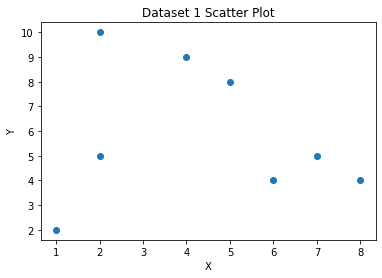

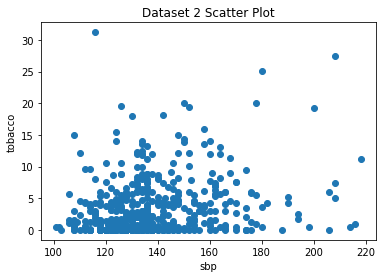

In [ ]:
# Dataset 1
dataset1_dict = {'dp':[1, 2, 3, 4, 5, 6, 7, 8], 'location': [[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]]}
#dataset1_dict = {'dp':[1, 2, 3, 4, 5, 6, 7, 8], 'location': [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9], [5, 2], [6, 3]]}
                 
# Distance matrix
distance_matrix = pairwise_distances(dataset1_dict['location'])

# unpack coordinates
x1, y1 = zip(*dataset1_dict['location'])

# Dataset 2
dataset2 = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
dataset2 = dataset2.loc[:, dataset2.columns != 'row.names']
dataset2 = dataset2.loc[:, dataset2.columns != 'famhist']

x2 = dataset2['sbp']
y2 = dataset2['tobacco']

# plot points
def plot_points(x, y, title, X = 'X', Y = 'Y'):
  plt.scatter(x, y)
  plt.title(f'{title} Scatter Plot')
  plt.xlabel(X)
  plt.ylabel(Y)
  #plt.grid(linestyle ='--')
  plt.show()

plot_points(x1,y1,'Dataset 1')
plot_points(x2, y2, 'Dataset 2', 'sbp', 'tobacco')

# K-means Clustering

## Dataset 1

In [ ]:
def calculate_distance(x1, y1, x2, y2):
  dist = math.sqrt(abs((x1-x2)**2 + (y1-y2)**2))
  return dist

def draw_cluster(clusters, dataset_num, epochs, x_label, y_label):
  colors = ['red', 'green', 'blue']
  for i, centroid in enumerate(clusters['centroids']):
    plt.scatter(clusters[f'cluster{i}']['x'], clusters[f'cluster{i}']['y'] , color = colors[i], label = f'Cluster {i}')
    plt.scatter(centroid[0], centroid[1], marker = 'x', s=60, color = 'black')

  plt.title(f'K-means Cluster for Dataset {dataset_num} with {epochs} Epoch(s)')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  if dataset_num == 1:
    plt.axis([0, 10, 0, 11])
  plt.show()

def perform_k_means_cluster(starting_points, x, y, dataset_num, pointwise_points, x_label = 'X', y_label = 'Y'):
  centroids = []

  if (dataset_num == 1):
    for i in range(len(starting_points)):
      centroids.append(pointwise_points[starting_points[i]-1])
  else:
    for points in starting_points:
      centroids.append(points)

  # define clusters dictionary
  clusters = {'centroids': centroids, 'predictions': []}

  for i in range(len(starting_points)):
    clusters.update({f'cluster{i}': {'x':[], 'y':[]}})
  

  # visualize cluster at zero epoch
  colors = ['red', 'green', 'blue']
  for i, centroid in enumerate(clusters['centroids']):
    plt.scatter(centroid[0], centroid[1], marker = 'x', s=60, color = colors[i])
  plt.scatter(x, y)
  plt.title(f'K-means Cluster for Dataset {dataset_num} at initialization')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if dataset_num == 1:
    plt.axis([0, 10, 0, 11])
  plt.show()

  epochs = 1
  converged = False
  # loop through until convergence
  while not converged:
    #keep track of old centroids
    old_centroids =  clusters['centroids'].copy()

    # loop through each element in dataset
    for point in pointwise_points:

      # check distance of each point and the centroids
      point_x, point_y = point

      distances = []
      for centroid in clusters['centroids']:
        centroid_x, centroid_y = centroid
        distances.append(calculate_distance(point_x, point_y, centroid_x, centroid_y))

      # find the minimum and assign the point to a cluster
      point_cluster = distances.index(min(distances))

      clusters[f'cluster{point_cluster}']['x'].append(point_x)
      clusters[f'cluster{point_cluster}']['y'].append(point_y)
      clusters['predictions'].append(point_cluster)

    # update centroids
    for i, centroid in enumerate(clusters['centroids']):
      clusters_x = clusters[f'cluster{i}']['x']
      clusters_y = clusters[f'cluster{i}']['y']

      clusters['centroids'][i] = [sum(clusters_x)/len(clusters_x), sum(clusters_y)/len(clusters_y)]
    
    # check for convergence
    if sorted(clusters['centroids']) == sorted(old_centroids):
      converged = True
      

    # visualize clusters
    print('\n',clusters)
    if dataset_num == 1 or converged:
      draw_cluster(clusters, dataset_num, epochs, x_label, y_label)

    # convergence statement
    if converged:
      print('Model converged at epoch:', epochs)
      return clusters
    epochs += 1

    # reset clusters
    for i, centroid in enumerate(clusters['centroids']):
      clusters[f'cluster{i}']['x'] = []
      clusters[f'cluster{i}']['y'] = []
      clusters['predictions'] = []

  return clusters

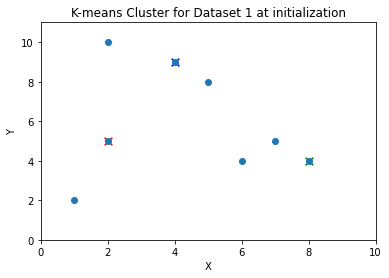


 {'centroids': [[1.5, 3.5], [7.0, 4.333333333333333], [3.6666666666666665, 9.0]], 'predictions': [2, 0, 1, 2, 1, 1, 0, 2], 'cluster0': {'x': [2, 1], 'y': [5, 2]}, 'cluster1': {'x': [8, 7, 6], 'y': [4, 5, 4]}, 'cluster2': {'x': [2, 5, 4], 'y': [10, 8, 9]}}


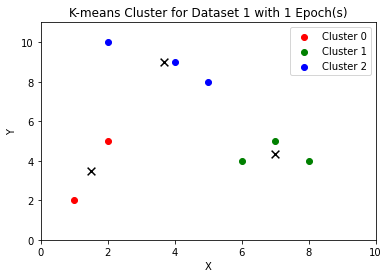


 {'centroids': [[1.5, 3.5], [7.0, 4.333333333333333], [3.6666666666666665, 9.0]], 'predictions': [2, 0, 1, 2, 1, 1, 0, 2], 'cluster0': {'x': [2, 1], 'y': [5, 2]}, 'cluster1': {'x': [8, 7, 6], 'y': [4, 5, 4]}, 'cluster2': {'x': [2, 5, 4], 'y': [10, 8, 9]}}


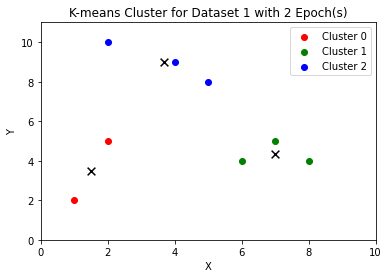

Model converged at epoch: 2


{'centroids': [[1.5, 3.5],
  [7.0, 4.333333333333333],
  [3.6666666666666665, 9.0]],
 'predictions': [2, 0, 1, 2, 1, 1, 0, 2],
 'cluster0': {'x': [2, 1], 'y': [5, 2]},
 'cluster1': {'x': [8, 7, 6], 'y': [4, 5, 4]},
 'cluster2': {'x': [2, 5, 4], 'y': [10, 8, 9]}}

In [ ]:
perform_k_means_cluster([2, 3, 8], x1, y1, 1,dataset1_dict['location'])


Q4: There no more iterations needed after the first epoch to converge. Just by visual inspection, we can see that the model has converged to the most optimal setting.

Q5: As explained above, there is no need to run the model again on an epoch higher than 1 because the model has already converged after the first epoch

## Dataset 2

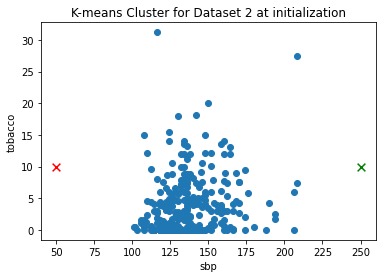


 {'centroids': [[128.61475409836066, 3.3367213114754093], [167.14285714285714, 5.056071428571429]], 'predictions': [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0

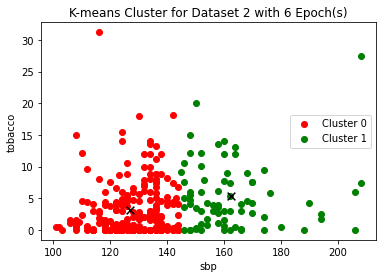

Model converged at epoch: 6


In [ ]:
# get tuple of points from dataset 2
dataset2_pair_points = []
for a, b in zip(x2, y2):
  dataset2_pair_points.append([a, b])

training_set_k_means = dataset2_pair_points[:300]
training_labels_k_means = dataset2['chd'][:300].to_numpy()
test_set_k_means = dataset2_pair_points[300:]
test_labels_k_means = dataset2['chd'][300:].to_numpy()

x2 = dataset2['sbp'][:300]
y2 = dataset2['tobacco'][:300]

clusters_k_means = perform_k_means_cluster([[50, 10], [250, 10]], x2, y2, 2,training_set_k_means, 'sbp', 'tobacco')


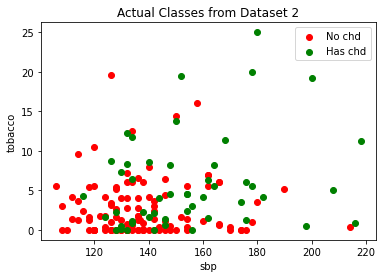

In [ ]:
# plot actual data points
dataset2_actual = dataset2[300:]
dataset2_actual_1 = dataset2_actual.loc[dataset2_actual['chd'] == 1]
dataset2_actual_0 = dataset2_actual.loc[dataset2_actual['chd'] == 0]

x2_actual_1 = dataset2_actual_1['sbp']
y2_actual_1 = dataset2_actual_1['tobacco']
x2_actual_0 = dataset2_actual_0['sbp']
y2_actual_0 = dataset2_actual_0['tobacco']

def show_actual_values_k_means(x1, y1, x2, y2):
  plt.scatter(x1, y1 , color = 'red', label = 'No chd')
  plt.scatter(x2, y2 , color = 'green', label = 'Has chd')
  plt.legend()
  plt.xlabel('sbp')
  plt.ylabel('tobacco')
  plt.title('Actual Classes from Dataset 2')
  plt.show()

show_actual_values_k_means(x2_actual_0, y2_actual_0, x2_actual_1, y2_actual_1)

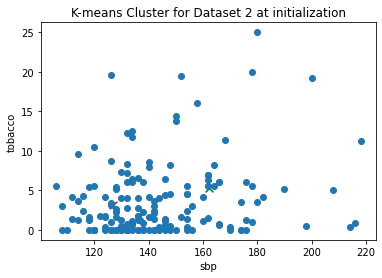


 {'centroids': [[129.36274509803923, 2.7864705882352943], [166.16666666666666, 4.9691666666666645]], 'predictions': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], 'cluster0': {'x': [138, 138, 128, 136, 128, 132, 142, 130, 114, 124, 114, 142, 140, 136, 132, 128, 106, 144, 126, 134, 130, 138, 124, 118, 116, 138, 137, 128, 130, 120, 136, 134, 122, 134, 134, 136, 132, 132, 124, 140, 132, 134, 126, 132, 128, 128, 140, 126, 114, 118, 126, 112, 140, 140, 128, 126, 144, 130, 134, 142, 126, 126, 134, 132, 116, 112, 120, 134, 132, 126, 120, 142, 132, 142, 132, 1

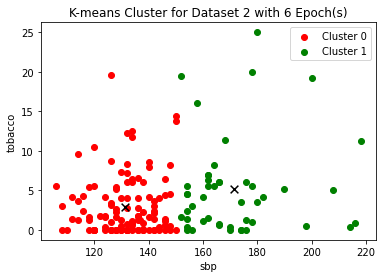

Model converged at epoch: 6


In [ ]:
# plot predicted points
x2 = dataset2['sbp'][300:]
y2 = dataset2['tobacco'][300:]
test_set_k_means = dataset2_pair_points[300:]
predicted_clusters = perform_k_means_cluster(clusters_k_means['centroids'], x2, y2, 2, test_set_k_means, 'sbp', 'tobacco')

Accuracy for test sample: 0.6975308641975309


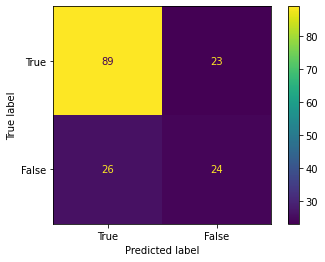

In [ ]:
cm = confusion_matrix(test_labels_k_means, predicted_clusters['predictions'])
tn, fp, fn, tp = confusion_matrix(test_labels_k_means, predicted_clusters['predictions']).ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
disp.plot()
plt.show()

# Nearest Neighbour Clustering

## Dataset 1

In [ ]:
def show_cluster_nearest_neighbour(clusters, dataset_num, x_label, y_label):
  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
  for i, cluster in enumerate(clusters['clusters']):
      x1, y1 = zip(*cluster[f'cluster{i}'])
      plt.scatter(x1, y1 , color = np.random.rand(3,), label = f'Cluster {i}')
     

  plt.title(f'Nearest Neighbour Cluster for Dataset {dataset_num}')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

def perform_nearest_neighbour(starting_point, x, y, pointwise_points, threshold, dataset_num, x_label = 'X', y_label = 'Y'):


  # define clusters dictionary
  num_cluster = 0
  clusters = {'predictions': [], 'clusters':[{f'cluster{num_cluster}': [starting_point]}] }
  points = pointwise_points.copy()
  points.remove(starting_point)
  clusters['predictions'].append(num_cluster)
  
       
  # visualize cluster at zero epoch
  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
  plt.scatter(x, y)
  plt.title(f'Nearest Neighbour Cluster for Dataset {dataset_num} at initialization')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.scatter(starting_point[0], starting_point[1], marker='x', color=colors[0])
  plt.show()


  # loop through each element in dataset
  for point in points:

    # check distance of each point and the clusters
    point_x, point_y = point

    distances = {'cluster': [], 'distance': []}
    mergeable = False
    for i, cluster in enumerate(clusters['clusters']):
      for cluster_points in cluster[f'cluster{i}']:
        cluster_x, cluster_y = cluster_points
        #print(calculate_distance(point_x, point_y, cluster_x, cluster_y))
        distance = calculate_distance(point_x, point_y, cluster_x, cluster_y)
        if distance < threshold:
          distances['cluster'].append(i)
          distances['distance'].append(distance)
          mergeable = True

    if mergeable:
      index = distances['distance'].index(min(distances['distance']))
      cluster_num = distances['cluster'][index]
      clusters['clusters'][cluster_num][f'cluster{cluster_num}'].append(point)
      clusters['predictions'].append(cluster_num)
      continue

    # if point is not mergeable, form a new cluster
    num_cluster += 1
    clusters['clusters'].append({f'cluster{num_cluster}': [point]})
    clusters['predictions'].append(num_cluster)
  print(clusters)
  show_cluster_nearest_neighbour(clusters, dataset_num, x_label, y_label)  
  return clusters

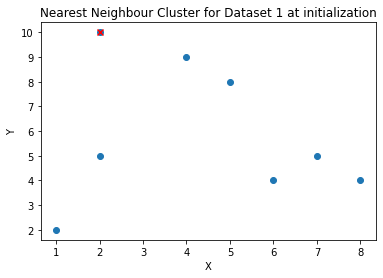

{'predictions': [0, 1, 2, 0, 2, 2, 1, 0], 'clusters': [{'cluster0': [[2, 10], [5, 8], [4, 9]]}, {'cluster1': [[2, 5], [1, 2]]}, {'cluster2': [[8, 4], [7, 5], [6, 4]]}]}


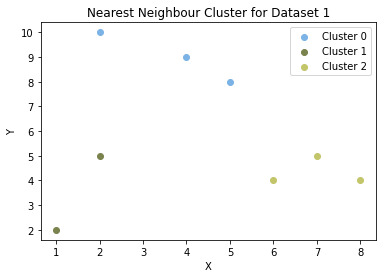

{'predictions': [0, 1, 2, 0, 2, 2, 1, 0], 'clusters': [{'cluster0': [[2, 10], [5, 8], [4, 9]]}, {'cluster1': [[2, 5], [1, 2]]}, {'cluster2': [[8, 4], [7, 5], [6, 4]]}]}


In [ ]:
print(perform_nearest_neighbour([2,10], x1, y1, dataset1_dict['location'], 4, 1))

Q9) Yes, for this dataset, we got the same result as using K-means

Q11) K-means assigns points to K number of clusters whereas Nearest-Neighbours assign each data point to the nearest cluster center. In terms of performance, K-means is faster with larger datasets because it just has to calculate the closes point per K centroids (i.e. k*N), whereas Nearest Neighbours have to calculate the distances between each points and cluster points (N*N). K-means, however, suffer from less flexibility as initial seeds are an important hyper parameter can result in suboptimal solution whereas Nearest-Neighbours is more flexible but is also prone to suboptimal solutions

## Dataset 2

In [ ]:
# standardize data
scaler = StandardScaler()
standardize_features = ['sbp','tobacco']


x2 = dataset2['sbp']
y2 = dataset2['tobacco']
standardize_data = pd.DataFrame(scaler.fit_transform(dataset2[standardize_features]), columns=dataset2[standardize_features].columns)
x2_std = standardize_data['sbp']
y2_std = standardize_data['tobacco']

dataset2_pair_points = []
for a, b in zip(x2_std, y2_std):
  dataset2_pair_points.append([a, b])

training_set_nn = dataset2_pair_points[:300]
test_set_nn = dataset2_pair_points[300:]
print(test_set_nn)
print(training_set_k_means)


[[-0.01596355687014608, -0.7924170161062298], [-0.01596355687014608, -0.29765350811284574], [1.5469849515287766, -0.7924170161062298], [-0.5043849657448094, -0.7924170161062298], [-0.11364783864507874, -0.5308680250965114], [-0.5043849657448094, -0.7924170161062298], [0.5701421337794499, 2.3461708760103916], [-0.3090164021949441, 1.0384259209617994], [0.17940500667971926, -0.2693190340867929], [-0.40670068396987674, -0.7815191414808249], [1.742353515078642, -0.02956579232788433], [-1.188174938169338, 1.2999749119715178], [1.156247824429046, -0.4654807773440818], [1.742353515078642, -0.7924170161062298], [2.5238277692781033, 0.33006407031047863], [0.7655106973293153, -0.4872765265948916], [-0.6997535292946747, -0.7924170161062298], [-1.188174938169338, -0.5308680250965114], [1.449300669753844, 1.6922983984860958], [0.17940500667971926, 0.018384856023897427], [0.7655106973293153, -0.7924170161062298], [0.3747735702295846, 0.15787765122908062], [1.3516163879789114, 0.5153279389423624], [0

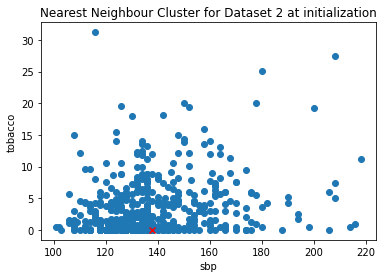

{'predictions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'clusters': [{'cluster0': [[138, 0.0], [160, 12.0], [144, 0.01], [118, 0.08], [170

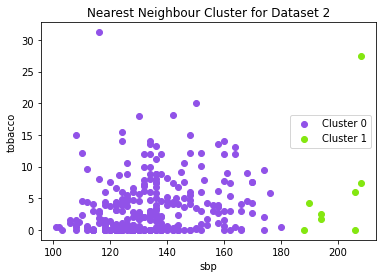

In [ ]:
test=perform_nearest_neighbour([138, 0.0], x2, y2, training_set_k_means, 27, 2, 'sbp', 'tobacco')

**Assumption:** Since we need to classify the dataset into a binary class, we have to find threshold, t, such that only 2 clusters can form. In order to do this, we have to first standardize the data and find t, which in this case is t = 2.

[[-0.01596355687014608, -0.7924170161062298], [-0.01596355687014608, -0.29765350811284574], [1.5469849515287766, -0.7924170161062298], [-0.5043849657448094, -0.7924170161062298], [-0.11364783864507874, -0.5308680250965114], [-0.5043849657448094, -0.7924170161062298], [0.5701421337794499, 2.3461708760103916], [-0.3090164021949441, 1.0384259209617994], [0.17940500667971926, -0.2693190340867929], [-0.40670068396987674, -0.7815191414808249], [1.742353515078642, -0.02956579232788433], [-1.188174938169338, 1.2999749119715178], [1.156247824429046, -0.4654807773440818], [1.742353515078642, -0.7924170161062298], [2.5238277692781033, 0.33006407031047863], [0.7655106973293153, -0.4872765265948916], [-0.6997535292946747, -0.7924170161062298], [-1.188174938169338, -0.5308680250965114], [1.449300669753844, 1.6922983984860958], [0.17940500667971926, 0.018384856023897427], [0.7655106973293153, -0.7924170161062298], [0.3747735702295846, 0.15787765122908062], [1.3516163879789114, 0.5153279389423624], [0

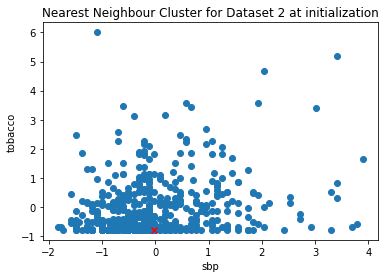

{'predictions': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'clusters': [{'cluster0': [[-0.01596355687014608, -0.7924170161062298], [-0.01596355687014608, -0.29765350811284574], [1.5469849515287766, -0.7924170161062298], [-0.5043849657448094, -0.7924170161062298], [-0.11364783864507874, -0.5308680250965114], [-0.5043849657448094, -0.7924170161062298], [-0.3090164021949441, 1.0384259209617994], [0.17940500667971926, -0.2693190340867929], [-0.40670068396987674, -0.7815191414808249], [1.742353515078642, -0.02956579232788433], [-1.188174938169338, 1.2999

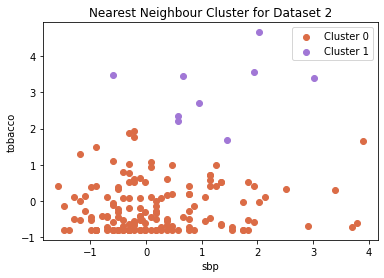

In [ ]:
print(test_set_nn)
nn_cluster = perform_nearest_neighbour([-0.01596355687014608, -0.7924170161062298], x2_std, y2_std, test_set_nn, 2, 2, 'sbp', 'tobacco')

Accuracy for test sample: 0.6975308641975309


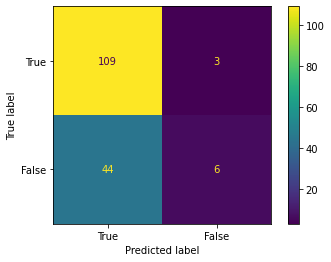

In [ ]:
cm = confusion_matrix(test_labels_k_means, nn_cluster['predictions'])
tn, fp, fn, tp = confusion_matrix(test_labels_k_means, predicted_clusters['predictions']).ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
disp.plot()
plt.show()

# DBScan Clustering

## Dataset 1

In [ ]:
def show_cluster_dbscan(clusters, dataset_num, x_label, y_label):
  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
  for i, cluster in enumerate(clusters['clusters']):
    if i == 0:
      continue

    x1, y1 = zip(*clusters['clusters'][i][f'cluster{i}'])
    plt.scatter(x1, y1 , color = np.random.rand(3,), label = f'Cluster {i}')
  
  x1, y1 = zip(*clusters['noise'])
  plt.scatter(x1, y1 , color = 'black', label = f'Noise points')


  plt.title(f'DBScan Cluster for Dataset {dataset_num}')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

def perform_dbscan(starting_point, x, y, pointwise_points, threshold, epsilon, dataset_num, x_label = 'X', y_label = 'Y'):


  # define clusters dictionary
  num_cluster = 0
  clusters = {'predictions': [], 'clusters':[{f'cluster{num_cluster}': []}], 'noise': [] }
  points = pointwise_points.copy()
  
       
  # visualize cluster at zero epoch
  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
  plt.scatter(x, y)
  plt.title(f'DBScan Cluster for Dataset {dataset_num} at initialization')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.scatter(starting_point[0], starting_point[1], marker='x', color=colors[0])
  plt.show()

  all_points = points.copy()
  # loop through each element in dataset
  for point in points:
    recurse_dbscan_cluster(point, clusters, all_points, points, threshold, epsilon)
  
  show_cluster_dbscan(clusters, dataset_num, x_label, y_label)
  return clusters

In [ ]:
def recurse_dbscan_cluster(this_point, clusters, all_points, non_cluster_points, threshold, epsilon):
 # check for cluster condition
  point_x, point_y = this_point
  neighbouring_points = {'distance': [], 'point': []}
    
  # find all neighbours of this_point within the threshold
  for other_point in all_points:
    other_point_x, other_point_y = other_point
    distance = calculate_distance(point_x, point_y, other_point_x, other_point_y)

    if distance < threshold:
      neighbouring_points['distance'].append(distance)
      neighbouring_points['point'].append(other_point)
  
  # check epsilon status
  new_cluster = True
  if len(neighbouring_points['point']) >= epsilon:
    # get current cluster
    num_cluster = len(clusters['clusters']) - 1

    for i in range(num_cluster+1):
      for cluster_point in clusters['clusters'][i][f'cluster{i}']:
        if cluster_point in neighbouring_points['point']:
          #print('cluster_point:', cluster_point)
          neighbouring_points['point'].remove(cluster_point)
          new_cluster = False
  
    #create cluster
    if new_cluster:
      num_cluster += 1
      clusters['clusters'].append({f'cluster{num_cluster}': []})

    for cluster_point in neighbouring_points['point']:
      clusters['predictions'].append(num_cluster)
      clusters['clusters'][num_cluster][f'cluster{num_cluster}'].append(cluster_point)

    # remove current point from neighbouring_points
    if this_point in neighbouring_points['point']:
      neighbouring_points['point'].remove(this_point)

    # recurse through each neighbouring point
    for cluster_point in neighbouring_points['point']:
      recurse_dbscan_cluster(cluster_point, clusters, all_points, non_cluster_points, threshold, epsilon)
  else:
    clusters['noise'].append(this_point)
    clusters['predictions'].append(-1)

**Epsilon = 2**

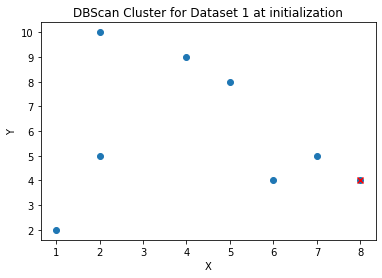

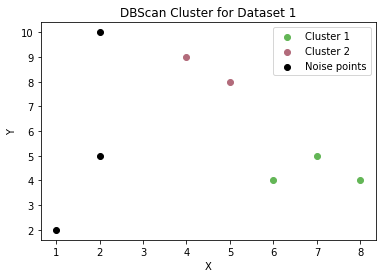

{'predictions': [-1, -1, 1, 1, 1, 2, 2, -1],
 'clusters': [{'cluster0': []},
  {'cluster1': [[8, 4], [7, 5], [6, 4]]},
  {'cluster2': [[5, 8], [4, 9]]}],
 'noise': [[2, 10], [2, 5], [1, 2]]}

In [ ]:
perform_dbscan([8,4], x1, y1, dataset1_dict['location'], 2, 2, 1)

**Epsilon = sqrt(10)**

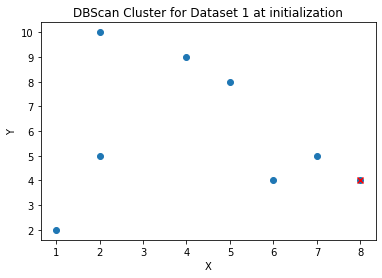

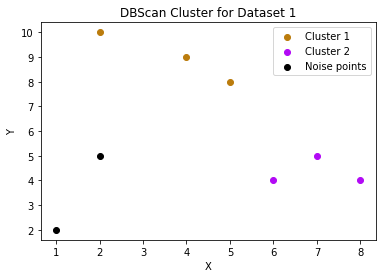

{'predictions': [1, 1, 1, -1, 2, 2, 2, -1],
 'clusters': [{'cluster0': []},
  {'cluster1': [[2, 10], [4, 9], [5, 8]]},
  {'cluster2': [[8, 4], [7, 5], [6, 4]]}],
 'noise': [[2, 5], [1, 2]]}

In [ ]:
perform_dbscan([8,4], x1, y1, dataset1_dict['location'], math.sqrt(10), 2, 1)

## Dataset 2

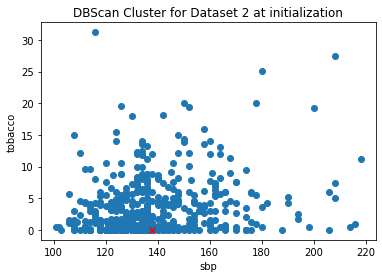

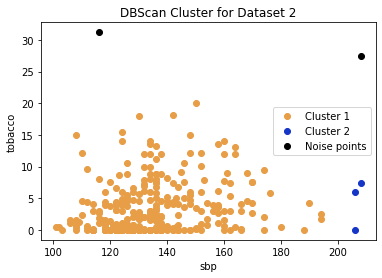

In [ ]:
dbscan_pred1 = perform_dbscan([138, 0.0], x2, y2, training_set_k_means,11, 2, 2,'sbp', 'tobacco')

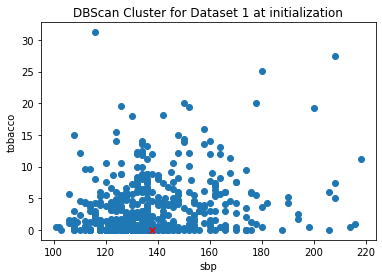

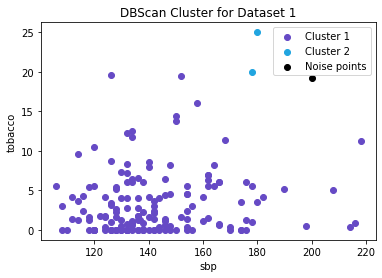

{'predictions': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, -1], 'clusters': [{'cluster0': []}, {'cluster1': [[138, 0.0], [138, 2.27], [128, 0.0], [136, 1.2], [128, 0.0], [132, 8.4], [142, 2.4], [130, 0.05], [142, 3.72], [146, 4.36], [140, 8.6], [136, 1.7], [132, 0.0], [128, 0.0], [144, 0.4], [134, 6.4], [146, 1.35], [130, 7.28], [138, 6.0], [148, 0.0], [138, 0.87], [137, 1.2], [130, 0.08], [136, 3.99], [134, 0.9], [134, 0.0], [136, 6.6], [132, 4.05], [140, 4.2], [132, 0.72], [134, 0.12], [148, 0.5], [132, 6.0], [128, 1.6], [140, 0.0], [140, 8.0], [140, 

In [ ]:
dbscan_pred = perform_dbscan([138, 0.0], x2, y2, test_set_k_means,11, 2, 1,'sbp', 'tobacco')
print(dbscan_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Accuracy for test sample: 0.6790123456790124


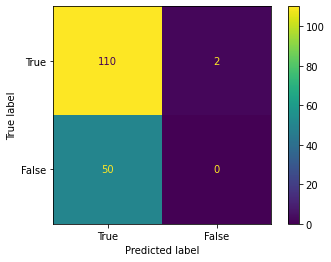

In [ ]:
for i,x in enumerate(dbscan_pred['predictions']):
  if x == -1:
    dbscan_pred['predictions'][i] = 0
  elif x == 1:
    dbscan_pred['predictions'][i] = 0
  elif x == 2:
    dbscan_pred['predictions'][i] = 1

print(dbscan_pred['predictions'])
cm = confusion_matrix(test_labels_k_means, dbscan_pred['predictions'])
tn, fp, fn, tp = confusion_matrix(test_labels_k_means, dbscan_pred['predictions']).ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
disp.plot()
plt.show()

# Scikit-Learn API

## K-means Clustering

-----------------------------------------
Apply K-Means for (K = [[127.09292035398231, 3.1276991150442477], [162.4189189189189, 5.276216216216216]]
-----------------------------------------
Cluster labels: [0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0]
Number of clusters: 2


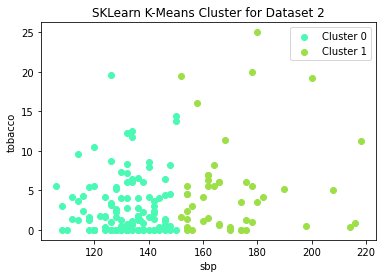

Accuracy for test sample: 0.6975308641975309


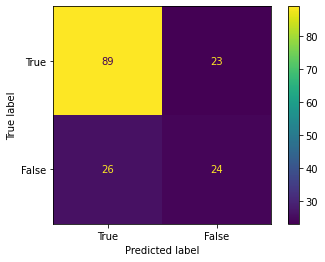

In [ ]:
from sklearn.cluster import KMeans

def show_sk_learn_k_means(labels, X):
  for i in set(labels):
    if i == -1:
      continue
    #print("Cluster", i+1, ":", X[labels == i])
    x1, y1 = zip(*X[labels == i])
    plt.scatter(x1, y1 , color = np.random.rand(3,), label = f'Cluster {i}')


  plt.title(f'SKLearn K-Means Cluster for Dataset 2')
  plt.xlabel('sbp')
  plt.ylabel('tobacco')
  plt.legend()
  plt.show()


def sklearn_k_means(X):
  print("-----------------------------------------")
  print(f"Apply K-Means for (K = {clusters_k_means['centroids']}")
  print("-----------------------------------------")
  
  X = np.array(X)

  kmeans = KMeans(n_clusters=2, init=np.array(clusters_k_means['centroids']), n_init = 1).fit(X)
  labels = kmeans.labels_


  # Print the clusters and the noise points

  print("Cluster labels:", labels)

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print("Number of clusters:", n_clusters_)

  show_sk_learn_k_means(labels, X)


  cm = confusion_matrix(test_labels_k_means, labels)
  tn, fp, fn, tp = confusion_matrix(test_labels_k_means, labels).ravel()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
  print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
  disp.plot()
  plt.show()


sklearn_k_means(test_set_k_means)

## Nearest Neighbour Clustering

-----------------------------------------
Apply Nearest Neighbours for threshold = 2
-----------------------------------------
Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of clusters: 1


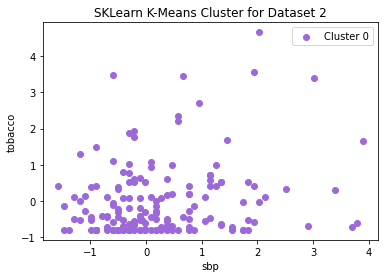

Accuracy for test sample: 0.691358024691358


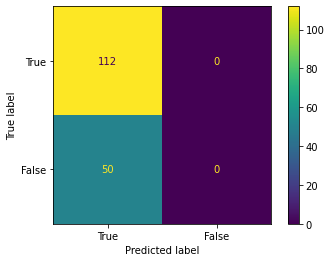

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import connected_components

def show_sklearn_nearest_neighbours(labels, X):
  for i in set(labels):
    if i == -1:
      continue
    #print("Cluster", i+1, ":", X[labels == i])
    x1, y1 = zip(*X[labels == i])
    plt.scatter(x1, y1 , color = np.random.rand(3,), label = f'Cluster {i}')


  plt.title(f'SKLearn K-Means Cluster for Dataset 2')
  plt.xlabel('sbp')
  plt.ylabel('tobacco')
  plt.legend()
  plt.show()

def sklearn_nearest_neighbours(X):
  print("-----------------------------------------")
  print(f"Apply Nearest Neighbours for threshold = 2")
  print("-----------------------------------------")

  X = np.array(X)

  neigh = NearestNeighbors(n_neighbors=1, radius=2).fit(X)
  graph = neigh.radius_neighbors_graph(X).toarray()
  n_components, labels = connected_components(graph)

  # Print the clusters and the noise points

  print("Cluster labels:", labels)

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print("Number of clusters:", n_clusters_)

  show_sklearn_nearest_neighbours(labels, X)


  cm = confusion_matrix(test_labels_k_means, labels)
  tn, fp, fn, tp = confusion_matrix(test_labels_k_means, labels).ravel()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
  print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
  disp.plot()
  plt.show()

sklearn_nearest_neighbours(test_set_nn)

## DBScan

-----------------------------------------
Apply DBSCAN for (eps=11, min_samples=2)
-----------------------------------------
Cluster labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Number of clusters: 2


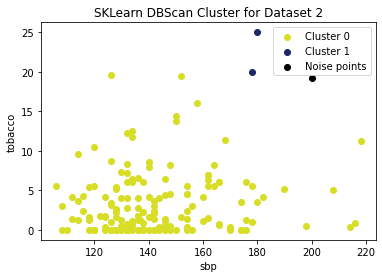

Accuracy for test sample: 0.7037037037037037


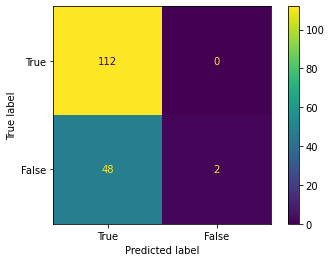

In [ ]:
from sklearn.cluster import DBSCAN

def show_sk_learn_dbscan(labels,X):

  for i in set(labels):
      if i == -1:
        continue
      #print("Cluster", i+1, ":", X[labels == i])
      x1, y1 = zip(*X[labels == i])
      plt.scatter(x1, y1 , color = np.random.rand(3,), label = f'Cluster {i}')


  x1, y1 = zip(*X[labels == -1])
  plt.scatter(x1, y1 , color = 'black', label = f'Noise points')


  plt.title(f'SKLearn DBScan Cluster for Dataset 2')
  plt.xlabel('sbp')
  plt.ylabel('tobacco')
  plt.legend()
  plt.show()

def sklearn_dbscan(X):
  print("-----------------------------------------")
  print("Apply DBSCAN for (eps=11, min_samples=2)")
  print("-----------------------------------------")

  # Apply DBSCAN for (eps=2, min_samples=2)
  X = np.array(X)
  db = DBSCAN(eps=11, min_samples=2).fit(X)
  labels = db.labels_


  # Print the clusters and the noise points

  print("Cluster labels:", labels)

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print("Number of clusters:", n_clusters_)

  show_sk_learn_dbscan(labels, X)

  for i,x in enumerate(labels):
    if x == -1:
      labels[i] = 0

  cm = confusion_matrix(test_labels_k_means, labels)
  tn, fp, fn, tp = confusion_matrix(test_labels_k_means, labels).ravel()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
  print('Accuracy for test sample:',  (tp+tn)/(tp+tn+fp+fn))
  disp.plot()
  plt.show()

sklearn_dbscan(test_set_k_means)

# Scikit-Learn API vs. Custom Models



*   In general, the Sci-kit learn API yielded similar results to the custom-built models

*   For K-Means, the accuracy for dataset 2 between the API and the custom model were identical: 
> 0.6975308641975309 vs. 0.6975308641975309 respectively

*   For Nearest Neighbour, the accuracy for dataset 2 between the API and the custom model were similar:
> 0.691358024691358 vs. 0.6975308641975309 respectively

*   For DBScan, the accuracy for dataset 2 between the API and the custom model were similar:
> 0.7037037037037037 vs. 0.6790123456790124 respectively



*   For DBScan, the accuracy is different because of the noise points and labeling them in the confusion matrix. 
*   For Nearest Neighbour, the accuracy is different because of the difference in implementation of the Scikit-learn API and the custom model. They classify the same conceptually, but the implementation is different.





# Questions


1.   Silhoutte Score (distance beween clusters), Rand Index (similarity between two clusters), Calinski-Harabasz index (strictly defined clusters...etc. 
2.   Since the we are using clustering methods to essentially solve for a classifying problem, we can classifying metrics such as precision, recall and f1-score to evaluate the performance of K-Means, Nearest Neighbours, and DBScan algorithms

